In [1]:
import math, time, statistics, numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_points(points, title):
    xs = [p[0] for p in points]
    ys = [p[1] for p in points]
    plt.figure(figsize=(5,5))
    plt.scatter(xs, ys, s=4)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(title)
    plt.xlabel("x"); plt.ylabel("y")
    plt.grid(True)
    plt.show()


In [60]:
def circle_polar_sincos(xc, yc, R):
    """
    Funcao que usa coordenadas polares para desenhar o circulo
    """

    # Conjunto para armazenar pixels visitados
    pixels = set()

    # Definicao do passo do angulo em radianos
    step = 1.0 / R
    
    # Percorre todo a circunferencai de 0 a 2pi radianos
    t = 0.0
    while t < 2*math.pi + 1e-12:

        # Calculo da posicao do x e y
        x = int(round(xc + R * math.cos(t)))
        y = int(round(yc + R * math.sin(t)))

        # Escreve no set
        pixels.add((x, y))

        # Incrementa o passo
        t += step
    
    # Retorna os pixels marcados
    return pixels

In [68]:
def circle_midpoint_bresenham(xc, yc, R):
    """
    Funcao que usa o metodo incremental
    """
    pixels = set()

    # Comeca no ponto mais a diretia
    x = 0
    y = R

    # Parametro de decisao inicial
    d = 1 - R 

    # Funcao para plotar todos os pontos simetricos (simetria de ordem 8)
    def plot8(x, y):
        pixels.add((xc + x, yc + y))
        pixels.add((xc + y, yc + x))
        pixels.add((xc + y, yc - x))
        pixels.add((xc + x, yc - y))
        pixels.add((xc - x, yc - y))
        pixels.add((xc - y, yc - x))
        pixels.add((xc - y, yc + x))
        pixels.add((xc - x, yc + y))
    
    # Plota os pontos iniciais
    plot8(x, y)

    # Percorre o primeiro octante
    while x < y:

        x += 1
        
        if d < 0:
            # O prox ponto esta dentro do circulo -> mov horizontal
            d += 2*x + 1
        else:
            # O prox ponto esta fora do circulo -> mov diagonal
            y -= 1
            d += 2*(x - y) + 1

        # Desenha os 8 pontos simetricos correspondentes
        plot8(x, y)
    return pixels

In [66]:
from tqdm import tqdm

def time_method(func, radius, repeats=10):
    """
    Funcao que avalia o tempo do metodo passado em func 7 vezes e tira a media
    """
    times = []
    for _ in (range(repeats)):
        t0 = time.perf_counter()
        _ = func(0, 0, radius)
        t1 = time.perf_counter()
        times.append(t1 - t0)
    return statistics.median(times), statistics.mean(times), min(times), max(times)

radius = [5, 10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120]
results = []

# Para cada raio, calcular o tempo mediano, medio e minimo de cada metodo
for R in radius:
    med_p, mean_p, min_p, max_p = time_method(circle_polar_sincos, R)
    med_m, mean_m, min_m, max_m = time_method(circle_midpoint_bresenham, R)
    results.append({
        "radius": R,
        "polar_sin_cos_median_s": med_p,
        "polar_sin_cos_mean_s": mean_p,
        "polar_sin_cos_min_s": min_p,
        "polar_sin_cos_max_s": max_p,
        "midpoint_median_s": med_m,
        "midpoint_mean_s": mean_m,
        "midpoint_min_s": min_m,
        "midpoint_max_s": max_m,
        "speedup_midpoint_vs_polar (median)": (med_p / med_m) if med_m>0 else float("inf"),
    })

# Junta tudo em um dataframe e salva
df = pd.DataFrame(results)
csv_path = "data/circle_timing_comparison.csv"
df.to_csv(csv_path, index=False)

print(df)

    radius  polar_sin_cos_median_s  polar_sin_cos_mean_s  polar_sin_cos_min_s  \
0        5                0.000101              0.000131             0.000081   
1       10                0.000156              0.000165             0.000151   
2       20                0.000311              0.000332             0.000297   
3       40                0.000674              0.000722             0.000592   
4       80                0.001466              0.001544             0.001230   
5      160                0.002804              0.002903             0.002464   
6      320                0.006623              0.006741             0.005654   
7      640                0.007079              0.008375             0.005524   
8     1280                0.016610              0.016480             0.015197   
9     2560                0.012788              0.012274             0.009454   
10    5120                0.024030              0.024832             0.021864   

    polar_sin_cos_max_s  mi

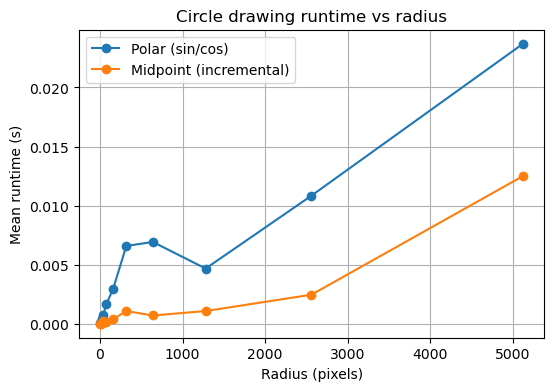

In [63]:
plt.figure(figsize=(6,4))
plt.plot(df["radius"], df["polar_sin_cos_mean_s"], marker="o", label="Polar (sin/cos)")
plt.plot(df["radius"], df["midpoint_mean_s"], marker="o", label="Midpoint (incremental)")
plt.xlabel("Radius (pixels)")
plt.ylabel("Mean runtime (s)")
plt.title("Circle drawing runtime vs radius")
plt.legend()
plt.grid(True)
plt.show()

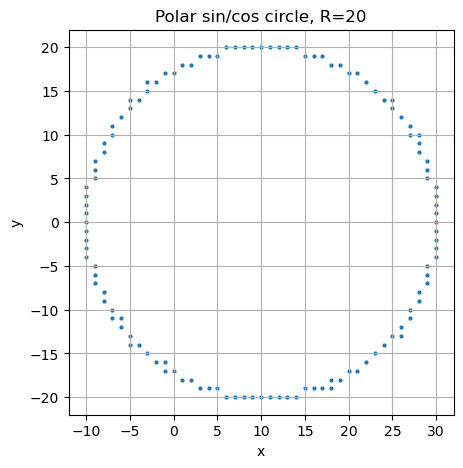

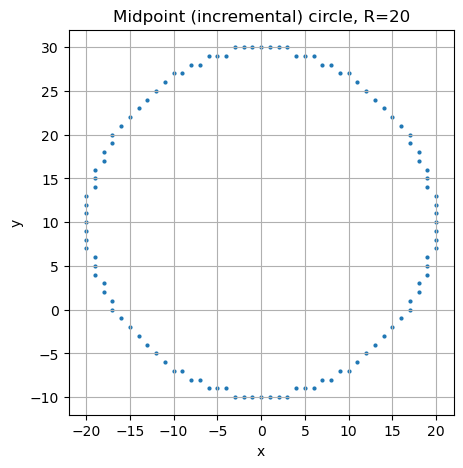

In [67]:
R_example = 20
pts_polar = circle_polar_sincos(10, 0, R_example)
plot_points(list(pts_polar), f"Polar sin/cos circle, R={R_example}")

pts_mid = circle_midpoint_bresenham(0, 10, R_example)
plot_points(list(pts_mid), f"Midpoint (incremental) circle, R={R_example}")